# Finding file and paragraph text representations 

The model produced is supposed to infer relations between sections of different documents from the database. This may be done by obtaining text representations of the sections and comparing their distance to a threshold. This notebook aims to compare possible approaches to retrieving said representations in a way that enables meaningful relation extraction from given document base.

## Preparing documents for input
Some sort of preprocessing customary to NLP tasks (stemming, lemmatization) may prove useful. This section provides the documents in several forms with various preprocessing applied for ease of comparison

In [1]:
import os
from tqdm import tqdm

In [2]:
documents = []
for filename in tqdm(os.listdir('./documents')):
    with open('./documents/' + filename, encoding='utf-8') as file:
        documents.append(file.read())

100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 1692.28it/s]


In [3]:
# Stemming 

# import nltk
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer('russian')

# stem_documents = []
# for doc in tqdm(documents):
#     tokens = nltk.word_tokenize(doc)
#     stems = [stemmer.stem(word) for word in tokens]

#     stem_documents.append(' '.join(stems))

In [4]:
# Lemmatization

import nltk
import pymorphy2 # Russian-language lemmatization
morph = pymorphy2.MorphAnalyzer()

lem_documents = []
for doc in tqdm(documents):
    tokens = nltk.word_tokenize(doc)
    lemmas = [morph.parse(word)[0].normal_form for word in tokens]
    
    lem_documents.append(' '.join(lemmas))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:10<00:00,  2.05it/s]


Apart from these options, we may consider dropping
- stopwords
- punctuation marks
- artifacts (e.g. image_14[0])

## Representation by S-BERT embeddings

Probably, the first thing that comes to mind. However, preliminary tests on short russian-language articles have shown alarmingly poor performance. Embeddings are extracted with the `sentence-transformers` python package. The model is chosen from blind faith in the words of KeyBERT developers (https://maartengr.github.io/KeyBERT/faq.html)

_Note that embeddings do not require preprocessing, as they are designed to work on natural language text_

Testing multilingual pretrained models produced poor results on a toy dataset. Hence, we install models trained for embedding Russian from DeepPavlov:
https://docs.deeppavlov.ai/en/master/features/pretrained_vectors.html

In [5]:
# from sentence_transformers import SentenceTransformer

# sbert_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# # Choose 

# input_texts = documets.copy()[3:7]

# # 2. Calculate embeddings by calling model.encode()
# embeddings_wiki = model.encode(characters_wiki)
# embeddings_dtf = model.encode(characters_dtf)
# print(embeddings_wiki.shape, embeddings_dtf.shape)
# # [3, 384]

# # 3. Calculate the embedding similarities
# similarities = model.similarity(embeddings_wiki, embeddings_dtf)
# print(similarities)

In [24]:
frag = [None] * 10

frag[0] = '''На данной вкладке заполняется:
Срок действия предложения - необходимо указать срок действия вашего предложения. Для этого необходимо нажать на иконку календаря в правой части строки. (Рисунок 5). Начало срока действия не может быть в прошлом.
Рисунок 5. Заполнение срока действия предложения

Валюта - по умолчанию указана валюта, заданная закупщиком в данной закупочной процедуре. Валюта может быть изменена на другую (выбрана из списка валют в данном окне), если возможность подачи предложения в другой валюте установлена на уровне закупочной процедуры (Рисунок 6). Если раскрывающегося списка нет, то необходимо обратиться к закупщику, объявившему данную закупку с просьбой внести дополнительную валюту в конкурс. Как посмотреть ответственного за закупку, описано в пункте 4.2. инструкции по просмотру ЗП.
Рисунок 6. Выбор валюты

Условие платежа - в данном поле указывается требуемое условия платежа. Если закупщик установил требуемые значения условия платежей и поставки, поставщик не может менять данные значения. В случае если закупщик разрешает менять поставщику условия платежа, данное поле открыто на редактирование. Чтобы выбрать другое условие платежа необходимо открыть справочник, нажав на кнопку. Откроется окно выбора условий платежа (Рисунок 7).
Рисунок 7. Поиск условий платежа

Поиск условий платежа можно осуществлять следующим образом: 
1) Выбрать предмет закупки - «ТМЦ» или «Услуги»; 
2) Выбрать вид оплаты: предоплата или постоплата (можно оставить поле пустым);
3) Выбрать код контрольного события. Варианты для выбора зависят от значения поля «Предмет закупки» (данное поле можно не заполнять);
4) При необходимости заполнить дополнительные поля: 
- Дополнительные дни ;
- Процентная ставка взноса.
5() Нажать кнопку «Поиск».
Рисунок 7. Поиск условий платежа

Так же при необходимости ограничить выборку еще больше, можно использовать аналогичные поля селекционного поля ниже (оранжевая рамка на рисунке 7).
Рисунок 7. Поиск условий платежа

Пример поиска с использованием двух полей представлен на рисунке 8. В верхней части данного рисунка представлено, как необходимо задавать критерии поиска, в нижней - результат данного поиска.
Рисунок 8. Пример поиска условия платежа

Услуга и поставка - условия поставки определяются кодом Инкотерм и местоположением (Рисунок 9). В случае, если закупщик заранее предопределил условие поставки, данное поле закрыто на редактирование для поставщика.
Рисунок 9. Услуга и поставка

Чтобы найти необходимый код Инктормс необходимо нажать на иконку  в поле «Инкотерм», откроется справочник (Рисунок 10):
Рисунок 10. Справочник инкотерм'''

frag[1] = '''
На данной вкладке заполняется:
Срок действия предложения - необходимо указать срок действия вашего предложения. Для этого необходимо нажать на иконку календаря в правой части строки. (Рисунок 5). Начало срока действия не может быть в прошлом.

Валюта - по умолчанию указана валюта, заданная закупщиком в данной закупочной процедуре. Валюта может быть изменена на другую (выбрана из списка валют в данном окне), если возможность подачи предложения в другой валюте установлена на уровне закупочной процедуры (Рисунок 6). Если раскрывающегося списка нет, то необходимо обратиться к закупщику, объявившему данную закупку с просьбой внести дополнительную валюту в конкурс. Как посмотреть ответственного за закупку, описано в пункте 4.2. инструкции по просмотру ЗП.

Услуга и поставка - условия поставки определяются кодом Инкотерм и местоположением (Рисунок 9). В случае, если закупщик заранее предопределил условие поставки, данное поле закрыто на редактирование для поставщика.

Чтобы найти необходимый код Инктормс необходимо нажать на в поле «Инкотерм», откроется справочник (Рисунок 10):

Из данного списка необходимо выбрать подходящее вам значение. После этого укажите местоположение в соответствующем поле (Рисунок 9).
'''

frag[2] = '''
На закладке «Позиции» хранится информация в табличном виде об услугах\работах . В рамках тендеров по услугам позиции хранятся в виде иерархии.
Первый уровень структура - это общая информация по требуемым услугам\работам. Для детализации какие требуются услуги и работы требуется на уровне структуры нажать черный треугольник, после чего откроется список требуемых услуг\работ. Данные по ценам\количеству заполняются на уровне конкретной услуги\работы. 
Заполнять данные по позициям можно в данной таблице. К заполнению доступны столбцы, подсвеченные белым.

Так же для заполнения данных по каждой позиции можно раскрывать подробную информацию по позиции. Для этого необходимо выделить строку с требуемой позицией и нажать «Подробно». Подробные данные откроются на странице ниже и выглядят следующим образом:

Заполнять можно строки, выделенные белым:
1) Предлагаемое количество - данное поле доступно к заполнению в случае, если закупщик предопределил возможность изменить заданный объем работ\услуг в указанной ЕИ.
2) Цена без НДС - указываем цену за услугу\работу, без учета НДС;
3) Цена «за» - указываем за какое количество подана цена (за 1 ЧЛЧ или за 100, например);
4) Условие платежа - данное поле заполняется на основании справочника. Поле можно заполнит на уровне структурной позиции. Тогда во все позиции работ\услуг подтянется указанное условие платежа без возможности изменения. В случае, если требуется указать на разных работах свои условия платежа, то необходимо в каждой работе\услуг указать свою условие платежа. В случае, если на уровне структуры или на уровне позиции услуги\работы не заполнено условие платежа, будет выводиться ошибка: 
5) ЕИ услуги - указывается ЕИ услуги из внутреннего справочника; 6. Номер продукта поставщика - внутренний номер данной номенклатуры в вашей компании или отличное наименование.
6) Номер продукта поставщика - внутренний номер данной номенклатуры в вашей компании или отличное наименование.

В случае, если для позиции закупщик в примечании «Определение ТМЦ в услугах» выбрал вариант «ТМЦ входит в состав работ», то для данной позиции завести ничего нельзя будет. Это означает, что данная позиция входит в состав работ\услуг и в соответствующей строке необходимо указывать стоимость по работам\услугам и ТМЦ совместно.
Переключение между строками осуществляется стрелками в левом углу. Если открыты подробные данные позиции, программа не позволит заполнять поля в табличной части как на Рисунок 17. Для заполнения позиций непосредственно в табличной части подробные данные позиции нужно закрыть.
В подробных данных позиции на вкладке «Вопросы» также требуется дать ответ, если к данной позиции задан вопрос 
'''

frag[3] = '''Ссылка на форму саморегистрации может быть получена двумя способами:
1) На сайте https://www.severstal.com/rus/suppliers/srm/faq.phtml
2) После обращения в службу поддержки, как это описано в предыдущем разделе

После получения ссылки для входа в форму саморегистрации необходимо ее заполнить и отправить. Форма саморегистрации может быть условно разделена на области:
1) «Общая информация о компании»
2) «Контактное лицо подробно»;
3) «Категории продуктов»;
4) «Заявление о защите данных».

В областях 1 и 2 поля с "*" обязательны к заполнению.

Внимание! На рисунке 3 представлен вид формы саморегистрации для резидентов Казахстана: отличаются обязательные поля в области 1.

Если по какой-либо причине в области 3 вы не можете выбрать категорию продукта, Вы можете оставить ее пустой, чтобы заполнить ее позднее, или обратиться к специалистам из службы технической поддержки SAP SRM за помощью. В случае необходимости уточнения указанных категорий продукта или изменения их состава (добавление новых или исключение ранее указанных), Вам необходимо написать письмо специалистам службы технической поддержки SAP SRM. В 4 области Вам необходимо ознакомиться с соглашением о конфиденциальности данных и подтвердить согласие установив V в чекбокс. Для того, чтобы ознакомиться с соглашением о конфиденциальности данных, необходимо нажать на «соглашение о конфиденциальности данных» на форме саморегистрации. После того, как все необходимые поля заполнены, и Вы убедились, что они корректны для отправки данных, нажмите на кнопку «Отправить». В случае, если Вы хотите очистить форму от заполненных значений без отправки, нажмите на кнопку «Вернуть записи». В случае, если все обязательные поля формы были заполнены корректно, и автоматическая проверка ее не отклонила, на Ваш почтовый ящик будут направлены письма.

Для поставщика будет направлено три письма:
- Письмо с временным паролем и ссылкой для создания учетной записи;
- Письмо с паролем для временной учетной записи;
- Письмо со ссылкой на квалификационную анкету.

При получении указанных писем поставщику необходимо:
1) Перейти по ссылке из третьего письма, заполнить квалификационную анкету и отправить ее
2) Создать учетную запись администратора организации.'''

frag[4] = '''**Групповой перенос дат**
- Для группового переноса дат поставки требуется выбрать необходимые позиции и нажать кнопку "Перенести":
1) В поле Планируемая дата поставки указать с помощью календаря плановую дату поставки позиции;
2) В поле Выберите причину указать причину переноса даты;
3) При необходимости оставьте комментарий поясняющий причину переноса или при отсутствии требуемой причины; 4) Нажать кнопку "Обработать все позиции".
- Позиция ЗнП может быть обработана после указания ее количества (количества по позиции) в полном размере во входящей поставке. В таком случае в позиции мониторинга будет указана плановая дата поставки из ВП и комментарий с номером ВП.
- Для отмены переноса дат позиций нажмите кнопку "Отменить обработку":
**Перенос даты одной позиции**
- Для переноса одной позиции требуется нажать на соответствующую кнопку:
1) В поле Планируемая дата поставки указать с помощью календаря плановую дату поставки позиции;
2) В поле Выберите причину указать причину переноса даты;
3) При необходимости оставьте комментарий поясняющий причину переноса или при отсутствии требуемой причины;  4) Нажать кнопку "Обработать позицию".
- Позиция ЗнП может быть обработана после указания ее количества (количества по позиции) в полном размере во входящей поставке. В таком случае в позиции мониторинга будет указана плановая дата поставки из ВП и комментарий с номером ВП.
- Для отмены переноса дат позиций нажмите кнопку "Отменить обработку".'''

frag[5] = '''# Памятка по заполнению банковских реквизитов

В случае, если при подаче предложения возникает ошибка с текстом «Необходимо внести данные по банковским реквизитам в личном кабинете (вкладка «Управление», закладка
«Данные предприятия»)»

1) необходимо зайти на вкладку «Управление», закладку «Данные предприятия»
2) нажать кнопку «Обработать»
3) перейти в блок «Банковские и налоговые данные»
4) Нажать кнопку «Новая строка»
Добавить данные в соответствии с алгоритмом ниже:
Страна - указывать страну банка;
1 Ключ банка(БИК) = БИК банка
2 Р/сч (без первых 2х цифр) = номер счета в банке без первых двух цифр и без пробелов 
3 Первые 2 цифры р\сч = первые две цифры номера счета в банке 
4 Владельц счета = укажите имя владельца счета
Далее нажмите сверху кнопку «Сохранить».

ВНИМАНИЕ! Внесенные данные должны быть утверждены администратором SRM.
Утверждение происходит в течение 3-х рабочих дней. Только после утверждения (Вам поступит об этом уведомление) Вы сможете подать свое предложение.'''

frag[6] = '''## 1.1 Поиск Конкурса С Помощью Критериев Поиска
Для поиска конкурса необходимо:
a) Нажимаем на кнопку «Быстрое введение критериев»; 
b) В поля критериев поиска вводим значения для поиска; 
c) Нажимаем на кнопку «Скопиров.»
Пример поиска по номеру конкурса представлен на рисунках 3 и 4.

В списке результатов должны появится все конкурсы, удовлетворяющие заданным критериям. 
Если в таблице результатов нет искомого конкурса, то Вам необходимо:
- проверить выбранные критерии; 
- проверить статус конкурса, если Вы ищете проводимый конкурс, то должен был быть выбран тип поискового запроса для web-конкурса «Все».
Примечание: по выбранным критериям поиска может не быть конкурсов, в этом случае таблица результатов будет пустой, пример представлен на рисунке 5. 
Рисунок 5. Пример результата без конкурсов'''

frag[7] = '''## Заполнение данных по позициям входящей поставки 
В разделе Данные по позициям входящей поставки имеется возможность фильтровать данные в таблице с позициями по параметрам:
- Номер склада
- Срок поставки 

Выполнять сортировку по одному или двум параметрам (2 поля сортировки):
- Номенклатурный номер
- Срок поставки
- Склад
- Наименование 

Установить отображаение только выбранных позиций:

Для указания поставляемых позиций в рамках создаваемой ВП использовать чекбокс рядом с необходимой позицией:
- В случае наличие нескольких одинаковых позиций с разным сроком поставки (из ЗнП), при выборе позиции с поздним сроком поставки система уведомит о наличии такой же позиции с ранним сроком поставки.

В столбце Количество плановой поставки указать поставляемое количество позиции:

При превышении допустимого количества система сообщит в уведомлении:

В столбце Страна происхождения для требуемых позиций указать страну происхождения позиции из списка значений:
- Поле Страна происхождения является обязательным для заполнения; 
- При наличии у позиции нескольких стран происхождения необходимо разделить позицию на требуемое количество с помощью кнопки:'''

frag[8] = '''## 7.2 Обязанности хранителя при работе с информационной системой
1. Приобрести за свой счёт антивирусное программное обеспечение и установить его на рабочие станции, с которых осуществляется доступ к информационной системе «MES
Удаленные склады», а также своевременно его обновлять.
2. Подавать заявки на предоставление доступа своих пользователей к информационной системе «MES Удаленные склады», в соответствии с процедурой, указанной в п. 4.1 настоящего регламента.
3. В течении одного рабочего дня уведомлять Клиента об увольнении своих сотрудников, имеющих доступ к информационной системе «MES Удаленные склады».
4. Незамедлительно информировать Клиента о фактах разглашения учетных данных и несанкционированного доступа к информационной системе «MES Удаленные склады».
5. До начала работы с информационной системой «MES Удаленные склады» провести информирование своих работников о правилах и принципах работы с ней.'''

frag[9] = '''Целью данного интерфейса является отображения текущего состояния наличия УЕ на УС, в том числе поступление УЕ.
Данный интерфейс позволяет отслеживать текущее наличие УЕ на УС до выкупа. Производить выкуп УЕ и отменять выкупа.
УЕ в приложении имеют статусы:
- В пути - УЕ отгружены с ЧерМК, но еще не оприходованы на УС
- В наличии - УЕ оприходованы на УС
- Отгружено - УЕ выкуплены у поклажедателя с УС

1) Для выкупа УЕ необходимо выбрать одну или более УЕ в статусе «В наличии», при этом активируется кнопка «Выкупить».
2) В открывшемся окне необходимо заполнить поля: № МХ-3 (по требованию пользователя возможна автогенирация номера акта) Дату создания акта МХ-3 После заполнения данных необходимо подтвердить действие через кнопку «Сохранить».
3) В колонке «МХ-3» появится № акта МХ-3, что является ссылкой на данный акт. Для перехода к просмотру его печатной формы, необходимо кликнуть на № акта. В колонке
«Статус акта мх-3» появится статус «Создан»
4) При первом нажатии на № акта, появится окно оповещение: "Сформирован акт МХ-3, просмотреть документ? ДА/НЕТ". Если Да, то откроется акт, который нужно проверить и если требуется - распечатать. Если НЕТ, то окно закроется. После первого клика на № акта, № МХ-3 меняет цвет на синий. Статус акта становится «Сформирован». При повторном клике на № акта синего цвета, открывается окно оповещение: "Подписать и направить АКТ №...... поклажедателю? ДА/НЕТ". Если ДА, то акт автоматически подписывается ПЭП со стороны пользователя и отправляется поклажедателю. Цвет № акта меняется на красный., статус акта становится «Отправленный». В колонке «Статус МХ-3», появится: "На выкуп". Цвет № акта меняется на красный. Статус акта становится «Отправленный» Если НЕТ, то окно закрывается, поклажедателю ничего не отправляется. После подписания акта поклажедателем, статус акта меняется на «Подписанный». При клике на номер акта открывается его печатная форма в формате pdf.
'''

frag.append('''
Целью данного интерфейса является отображения текущего состояния наличия УЕ на УС, в том числе поступление УЕ.
Данный интерфейс позволяет отслеживать текущее наличие УЕ на УС. Производить отгрузку УЕ с УС и отменять отгрузку.
УЕ в приложении имеют статусы:
- В пути - УЕ отгружены с ПАО «Северсталь», но еще не приняты на УС
- В наличии - УЕ приняты на УС
- Отгружено - УЕ отгружены с УС

Для отгрузки УЕ необходимо выбрать одну или более УЕ в статусе «В наличии», при этом активируется кнопка «Погрузить». В открывшемся окне необходимо заполнить доступные поля. После заполнения данных необходимо подтвердить действие через кнопку «Сохранить».
Если только заполнены параметры:
- № контейнера
- № пломбы
- № дата погрузки в контейнер,
то статус УЕ не меняется на "Отгружено"
Изменение статуса на отгружено произойдет только тогда, когда будут заполнены: №тс и № жд накладной или ТТН.

При отмене отгрузки, необходимо выбрать одну или более УЕ в статусе «Отгружен». При этом активируется кнопка «Отмена отгрузки». При нажатии на которую нужно указать причину отмены.

Система оповещает пользователя: «Вы действительно хотите отменить отгрузку?Да,Отменить/Нет». Если «Да, Отменить», то УЕ из статуса «Отгружен», переходят в статус «В наличии».
''')

In [73]:
from optimum.onnxruntime import ORTModelForFeatureExtraction
from transformers import AutoTokenizer

model_checkpoint = "ai-forever/sbert_large_nlu_ru"
save_directory = "./onnx/"

# Load a model from transformers and export it to ONNX
ort_model = ORTModelForFeatureExtraction.from_pretrained(model_checkpoint, export=True)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Save the onnx model and tokenizer
ort_model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

KeyError: 'bert is not supported yet with the onnx backend. Only [] are supported. If you want to support onnx please propose a PR or open up an issue.'

In [ ]:
import json
import torch
import torch.nn as nn

# Load configuration
with open('path/to/config.json') as f:
    config = json.load(f)

# Example: Create a simple BERT-like architecture (you would need to define this)
class SimpleBERT(nn.Module):
    def __init__(self, config):
        super(SimpleBERT, self).__init__()
        # Define layers based on config (this is a simplified version)
        self.embeddings = nn.Embedding(config['vocab_size'], config['hidden_size'])
        # Add other layers like transformers here...

    def forward(self, input_ids):
        embeddings = self.embeddings(input_ids)
        # Pass through other layers...
        return embeddings

# Instantiate model
model = SimpleBERT(config)


In [1]:
from transformers import pipeline
from sentence_transformers.util import pytorch_cos_sim as cosine_similarity 
from sentence_transformers import SentenceTransformer

emb_model = pipeline('feature-extraction', 'DeepPavlov/rubert-base-cased-sentence')

# emb_model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

D:\soft\miniconda\envs\hack\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\soft\miniconda\envs\hack\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()



1 - Подача заявления на аукцион, вкладка "данные"
2 - Подача на аукцион, другой документ, вкладка "данные"
3 - Подача на аукцион, другой раздел
4 - Регистрация поставщика
5 - Инструкция к сервису "Мониторинг...", групповой перенос дат
6 - Памятка по зап-нию банковских реквизитов
7 - Поиск конкурса
8 - Инструкция к сервису "Создание входящей поставки", заполнение данных поставки
9 - Удаленные склады 28 - обязанности хранителя
10 - Удаленные склады 28 - наличие металла
11 - Удаленные склады 29 - наличие металла


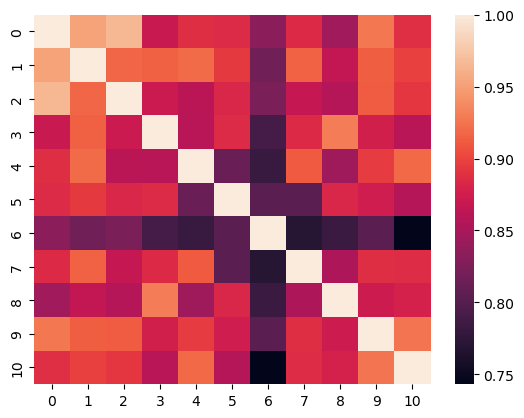

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

N = 11
cs = np.zeros((N, N))

doc_emb = [np.array(emb_model(f)).mean(1) for f in frag[:N]]

#doc_emb = [np.array(emb_model.encode(f)) for f in frag[:N]]

print('''
1 - Подача заявления на аукцион, вкладка "данные"
2 - Подача на аукцион, другой документ, вкладка "данные"
3 - Подача на аукцион, другой раздел
4 - Регистрация поставщика
5 - Инструкция к сервису "Мониторинг...", групповой перенос дат
6 - Памятка по зап-нию банковских реквизитов
7 - Поиск конкурса
8 - Инструкция к сервису "Создание входящей поставки", заполнение данных поставки
9 - Удаленные склады 28 - обязанности хранителя
10 - Удаленные склады 28 - наличие металла
11 - Удаленные склады 29 - наличие металла''')


for i in range(N):
    for j in range(N):
        cs[i, j] = cosine_similarity(doc_emb[i], doc_emb[j])

figure = sns.heatmap(cs).get_figure()

In [34]:
thresholds = np.linspace(0, 1, 1000)
tpr = []
fpr = []
true_pairs = set([(1, 2), (1, 3), (2, 3), (4, 8), (9, 10), (10, 11), (9, 11)])
for thresh in thresholds:
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(N):
        for j in range(N):
            if cs[i, j] > thresh:
                if ((i + 1, j + 1) in true_pairs or (j + 1, i + 1) in true_pairs):
                    tp += 1
                else:
                    fp += 1
            elif ((i + 1, j + 1) in true_pairs or (j + 1, i + 1) in true_pairs):
                fn += 1
            else:
                tn += 1
    tpr.append(tp/(tp + fn))
    fpr.append(fp/(fp + tn))

In [47]:
def roc_auc(tpr, fpr):
    fpr1 = fpr + [0]
    auc = 0.
    for i in range(len(tpr)):
        auc += tpr[i] * (fpr1[i+1] - fpr1[i])
    return auc

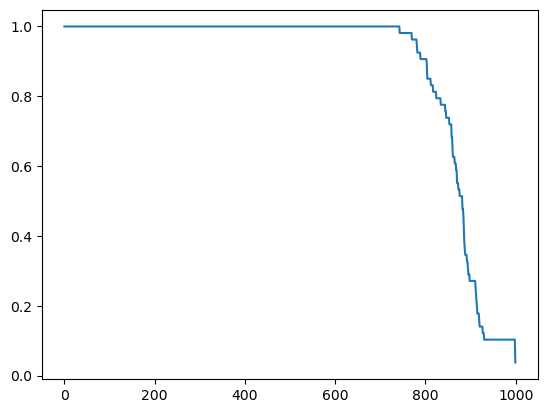

In [48]:
plt.plot(fpr)

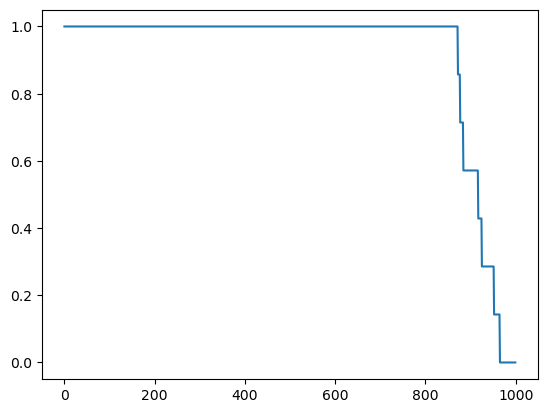

In [49]:
plt.plot(tpr)

In [59]:
np.trapz(tpr[::-1], fpr[::-1])

0.706275033377837

roc-auc = -0.7062750333778371


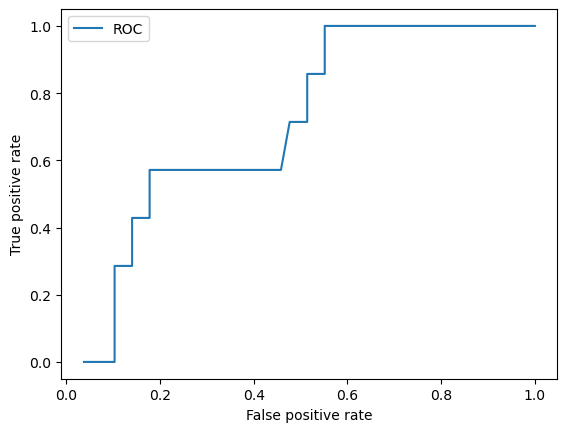

In [58]:
plt.plot(fpr, tpr, label='ROC')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.savefig('dp_precrec.png')
print(f'roc-auc = {np.trapz(tpr, fpr)}')

## Representation by keyword set
Another approach is to connect nodes (which are section contents in this case) when they share **named entities**. This approach is straightforwardly implemented using the KeyBERT model, as distributed from https://github.com/MaartenGr/KeyBERT

In [59]:
from keybert import KeyBERT

# This model is said to have 'shown great performance' on non-english documents 
# (https://maartengr.github.io/KeyBERT/faq.html)
kw_model = KeyBERT(model='paraphrase-multilingual-MiniLM-L12-v2') 

### Using unprocessed documents

In [76]:
kw_model.extract_keywords(documents[3], keyphrase_ngram_range=(3, 5))

[('процедуре тмц оглавление создание заявки', 0.6638),
 ('инструкция пользователя по подаче предложения', 0.6528),
 ('вкладка вопросы вкладка примечания приложения', 0.6222),
 ('вопросы вкладка примечания приложения', 0.5975),
 ('тмц оглавление создание заявки на', 0.5943)]

In [77]:
kw_model.extract_keywords(documents[3], keyphrase_ngram_range=(3, 5), use_maxsum=True, nr_candidates=20, top_n=5)

[('предложения закупочной процедуре тмц оглавление', 0.5361),
 ('создание заявки на участие предложение', 0.5365),
 ('открыть предложение режиме', 0.5389),
 ('инструкция пользователя по подаче', 0.5498),
 ('перейти по ссылке номером предложения', 0.5584)]

In [78]:
kw_model.extract_keywords(documents[3], keyphrase_ngram_range=(3, 5), use_mmr=True, diversity=0.3)

[('процедуре тмц оглавление создание заявки', 0.6638),
 ('инструкция пользователя по подаче предложения', 0.6528),
 ('вкладка вопросы вкладка примечания приложения', 0.6222),
 ('ссылке номером предложения', 0.5807),
 ('предложения на участие зп нажмите', 0.5581)]

### Using lemmatized documents

In [74]:
kw_model.extract_keywords(lem_documents[3], keyphrase_ngram_range=(1, 3))

[('указать для предложение', 0.5905),
 ('прописываться номер предложение', 0.5725),
 ('оглавление создание заявка', 0.5674),
 ('создание заявка на', 0.5641),
 ('скопировать предложение указать', 0.5504)]

In [75]:
kw_model.extract_keywords(lem_documents[3], keyphrase_ngram_range=(1, 3), use_maxsum=True, nr_candidates=20, top_n=5)

[('кнопка добавить выбрать', 0.5181),
 ('вкладка примечание приложение', 0.5249),
 ('модификация предложение перечень', 0.531),
 ('ссылка номер предложение', 0.5479),
 ('создание заявка', 0.548)]

In [73]:
kw_model.extract_keywords(lem_documents[3], keyphrase_ngram_range=(1, 3), use_mmr=True, diversity=0.3)

[('указать для предложение', 0.5905),
 ('оглавление создание заявка', 0.5674),
 ('ссылка номер предложение', 0.5479),
 ('конкурс закупщик добавить', 0.4751),
 ('регистрация зп 2_image_0', 0.4154)]

### Using stemmed documents

In [46]:
kw_model.extract_keywords(stem_doc, keyphrase_ngram_range=(1, 5))

[('памятк по заполнен банковск', 0.7283),
 ('памятк по заполнен банковск реквизит', 0.7141),
 ('внест дан по банковск реквизит', 0.7097),
 ('внест дан по банковск', 0.7039),
 ('кабинет вкладк управлен закладк', 0.6959)]

In [53]:
kw_model.extract_keywords(stem_doc, keyphrase_ngram_range=(1, 5), use_maxsum=True, nr_candidates=20, top_n=5)

[('личн кабинет вкладк управлен закладк', 0.6552),
 ('управлен закладк дан предприят нажа', 0.6567),
 ('банковск налогов дан нажа кнопк', 0.6638),
 ('необходим внест дан по банковск', 0.6652),
 ('кнопк обработа перейт блок банковск', 0.686)]

In [54]:
kw_model.extract_keywords(stem_doc, keyphrase_ngram_range=(1, 5), use_mmr=True, diversity=0.3)

[('памятк по заполнен банковск', 0.7283),
 ('вкладк управлен закладк дан предприят', 0.6959),
 ('кнопк обработа перейт блок банковск', 0.686),
 ('банковск налогов дан нажа кнопк', 0.6638),
 ('кнопк нов строк добав дан', 0.6167)]

## Representations by embeddings of LLM summaries

This is a terrible idea, really. But if none of the fixes from above work, it might come to this drastic measure. Basically, we prompt a locally'running LLM to summarize the paragraph, and construct embeddings for these summaries. We might as well throw in a translation into english while we're at it, won't make much of a difference at that point. 